In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
#nltk.download('punkt')
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [39]:
# load metacritic data
metacritic = pd.read_csv('sample_metacritic.csv')

In [40]:
#drop duplicates and check the shape of the data
metacritic.drop_duplicates()
print(metacritic.shape)


(146, 6)


In [41]:
# load stopwords commonlyused in the english language 
stopword = nltk.corpus.stopwords.words('english')

# Vader Compound Sentiment Calculations

In [42]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [43]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in metacritic['items']]
metacritic['sentiment_score'] = polarity

In [44]:
score_dict= metacritic['items'].apply(lambda items:sent.polarity_scores(items))

In [45]:
todf = dict()
for i in score_dict:
    for row in i: 
        if row not in todf.keys():
            todf[row] = [i[row]]
        else:
            todf[row].append(i[row])

In [46]:
new_d = pd.DataFrame.from_dict(todf)

In [47]:
new_d

,neg,neu,pos,compound
0,0.061,0.791,0.148,0.5053
1,0.000,0.879,0.121,0.5859
2,0.044,0.778,0.178,0.9359
3,0.047,0.922,0.031,0.0009
4,0.000,0.735,0.265,0.8910
...,...,...,...,...
141,0.122,0.772,0.106,-0.2204
142,0.000,0.829,0.171,0.7506
143,0.179,0.733,0.088,-0.5859
144,0.203,0.730,0.068,-0.7184


In [48]:
final = pd.merge(metacritic, new_d, right_index = True, left_index = True)

In [49]:
final.to_csv('sample_metacritic_vader.csv')

# Word2Vec Word Embedding Calculations

In [50]:
from nltk.tokenize import sent_tokenize, word_tokenize
#pip install gensim
import gensim
from gensim.models import Word2Vec

## Pre-Processing

In [51]:
# remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
metacritic['review_punct'] = metacritic['items'].apply(lambda x: remove_punct(x))
metacritic.head()


,Unnamed: 0,imDbId,title,fullTitle,year,items,sentiment_score,review_punct
0,6,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slant Magazine', 'author': 'Jake Cole', 'link': '', 'rate': '75', 'content': 'The...",0.51,publisher Slant Magazine author Jake Cole link rate content The film stands apart for thoughtf...
1,2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",0.59,publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...
2,14,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'Slashfilm', 'author': 'Hoai-Tran Bui', 'link': 'https://www.slashfilm.com/641297/...",0.94,publisher Slashfilm author HoaiTran Bui link httpswwwslashfilmcometernalsreviewawildlyambitiousb...
3,17,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'BBC', 'author': 'Nicholas Barber', 'link': 'https://www.bbc.com/culture/article/2...",0.00,publisher BBC author Nicholas Barber link httpswwwbbccomculturearticlethreestarsforchlozhaosdisa...
4,41,tt11214590,House of Gucci,House of Gucci (2021),2021,"{'publisher': 'Variety', 'author': 'Owen Gleiberman', 'link': 'https://variety.com/2021/film/rev...",0.89,publisher Variety author Owen Gleiberman link httpsvarietycomfilmreviewshouseofguccireviewladyga...


In [52]:
# tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
metacritic['review_tokenized'] = metacritic['review_punct'].apply(lambda x: tokenization(x))
metacritic.head()

,Unnamed: 0,imDbId,title,fullTitle,year,items,sentiment_score,review_punct,review_tokenized
0,6,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slant Magazine', 'author': 'Jake Cole', 'link': '', 'rate': '75', 'content': 'The...",0.51,publisher Slant Magazine author Jake Cole link rate content The film stands apart for thoughtf...,"[publisher, Slant, Magazine, author, Jake, Cole, link, rate, content, The, film, stands, apart, ..."
1,2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",0.59,publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...,"[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti..."
2,14,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'Slashfilm', 'author': 'Hoai-Tran Bui', 'link': 'https://www.slashfilm.com/641297/...",0.94,publisher Slashfilm author HoaiTran Bui link httpswwwslashfilmcometernalsreviewawildlyambitiousb...,"[publisher, Slashfilm, author, HoaiTran, Bui, link, httpswwwslashfilmcometernalsreviewawildlyamb..."
3,17,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'BBC', 'author': 'Nicholas Barber', 'link': 'https://www.bbc.com/culture/article/2...",0.00,publisher BBC author Nicholas Barber link httpswwwbbccomculturearticlethreestarsforchlozhaosdisa...,"[publisher, BBC, author, Nicholas, Barber, link, httpswwwbbccomculturearticlethreestarsforchlozh..."
4,41,tt11214590,House of Gucci,House of Gucci (2021),2021,"{'publisher': 'Variety', 'author': 'Owen Gleiberman', 'link': 'https://variety.com/2021/film/rev...",0.89,publisher Variety author Owen Gleiberman link httpsvarietycomfilmreviewshouseofguccireviewladyga...,"[publisher, Variety, author, Owen, Gleiberman, link, httpsvarietycomfilmreviewshouseofguccirevie..."


In [53]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
metacritic['review_nonstop'] = metacritic['review_tokenized'].apply(lambda x: remove_stopwords(x))
metacritic.head()

,Unnamed: 0,imDbId,title,fullTitle,year,items,sentiment_score,review_punct,review_tokenized,review_nonstop
0,6,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slant Magazine', 'author': 'Jake Cole', 'link': '', 'rate': '75', 'content': 'The...",0.51,publisher Slant Magazine author Jake Cole link rate content The film stands apart for thoughtf...,"[publisher, Slant, Magazine, author, Jake, Cole, link, rate, content, The, film, stands, apart, ...","[publisher, Slant, Magazine, author, Jake, Cole, link, rate, content, The, film, stands, apart, ..."
1,2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",0.59,publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...,"[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti...","[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti..."
2,14,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'Slashfilm', 'author': 'Hoai-Tran Bui', 'link': 'https://www.slashfilm.com/641297/...",0.94,publisher Slashfilm author HoaiTran Bui link httpswwwslashfilmcometernalsreviewawildlyambitiousb...,"[publisher, Slashfilm, author, HoaiTran, Bui, link, httpswwwslashfilmcometernalsreviewawildlyamb...","[publisher, Slashfilm, author, HoaiTran, Bui, link, httpswwwslashfilmcometernalsreviewawildlyamb..."
3,17,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'BBC', 'author': 'Nicholas Barber', 'link': 'https://www.bbc.com/culture/article/2...",0.00,publisher BBC author Nicholas Barber link httpswwwbbccomculturearticlethreestarsforchlozhaosdisa...,"[publisher, BBC, author, Nicholas, Barber, link, httpswwwbbccomculturearticlethreestarsforchlozh...","[publisher, BBC, author, Nicholas, Barber, link, httpswwwbbccomculturearticlethreestarsforchlozh..."
4,41,tt11214590,House of Gucci,House of Gucci (2021),2021,"{'publisher': 'Variety', 'author': 'Owen Gleiberman', 'link': 'https://variety.com/2021/film/rev...",0.89,publisher Variety author Owen Gleiberman link httpsvarietycomfilmreviewshouseofguccireviewladyga...,"[publisher, Variety, author, Owen, Gleiberman, link, httpsvarietycomfilmreviewshouseofguccirevie...","[publisher, Variety, author, Owen, Gleiberman, link, httpsvarietycomfilmreviewshouseofguccirevie..."


In [54]:
#Stemming and Lammitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

metacritic['review_stemmed'] = metacritic['review_nonstop'].apply(lambda x: stemming(x))
metacritic.head()

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

metacritic['review_lemmatized'] = metacritic['review_nonstop'].apply(lambda x: lemmatizer(x))
metacritic.head()

,Unnamed: 0,imDbId,title,fullTitle,year,items,sentiment_score,review_punct,review_tokenized,review_nonstop,review_stemmed,review_lemmatized
0,6,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slant Magazine', 'author': 'Jake Cole', 'link': '', 'rate': '75', 'content': 'The...",0.51,publisher Slant Magazine author Jake Cole link rate content The film stands apart for thoughtf...,"[publisher, Slant, Magazine, author, Jake, Cole, link, rate, content, The, film, stands, apart, ...","[publisher, Slant, Magazine, author, Jake, Cole, link, rate, content, The, film, stands, apart, ...","[publish, slant, magazin, author, jake, cole, link, rate, content, the, film, stand, apart, thou...","[publisher, Slant, Magazine, author, Jake, Cole, link, rate, content, The, film, stand, apart, t..."
1,2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",0.59,publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...,"[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti...","[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti...","[publish, thewrap, author, todd, gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpattins...","[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti..."
2,14,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'Slashfilm', 'author': 'Hoai-Tran Bui', 'link': 'https://www.slashfilm.com/641297/...",0.94,publisher Slashfilm author HoaiTran Bui link httpswwwslashfilmcometernalsreviewawildlyambitiousb...,"[publisher, Slashfilm, author, HoaiTran, Bui, link, httpswwwslashfilmcometernalsreviewawildlyamb...","[publisher, Slashfilm, author, HoaiTran, Bui, link, httpswwwslashfilmcometernalsreviewawildlyamb...","[publish, slashfilm, author, hoaitran, bui, link, httpswwwslashfilmcometernalsreviewawildlyambit...","[publisher, Slashfilm, author, HoaiTran, Bui, link, httpswwwslashfilmcometernalsreviewawildlyamb..."
3,17,tt9032400,Eternals,Eternals (2021),2021,"{'publisher': 'BBC', 'author': 'Nicholas Barber', 'link': 'https://www.bbc.com/culture/article/2...",0.00,publisher BBC author Nicholas Barber link httpswwwbbccomculturearticlethreestarsforchlozhaosdisa...,"[publisher, BBC, author, Nicholas, Barber, link, httpswwwbbccomculturearticlethreestarsforchlozh...","[publisher, BBC, author, Nicholas, Barber, link, httpswwwbbccomculturearticlethreestarsforchlozh...","[publish, bbc, author, nichola, barber, link, httpswwwbbccomculturearticlethreestarsforchlozhaos...","[publisher, BBC, author, Nicholas, Barber, link, httpswwwbbccomculturearticlethreestarsforchlozh..."
4,41,tt11214590,House of Gucci,House of Gucci (2021),2021,"{'publisher': 'Variety', 'author': 'Owen Gleiberman', 'link': 'https://variety.com/2021/film/rev...",0.89,publisher Variety author Owen Gleiberman link httpsvarietycomfilmreviewshouseofguccireviewladyga...,"[publisher, Variety, author, Owen, Gleiberman, link, httpsvarietycomfilmreviewshouseofguccirevie...","[publisher, Variety, author, Owen, Gleiberman, link, httpsvarietycomfilmreviewshouseofguccirevie...","[publish, varieti, author, owen, gleiberman, link, httpsvarietycomfilmreviewshouseofguccireviewl...","[publisher, Variety, author, Owen, Gleiberman, link, httpsvarietycomfilmreviewshouseofguccirevie..."


## Gensim Word2Vec Models

In [55]:
corpus_text = 'n'.join(metacritic['items'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [56]:
model1 = gensim.models.Word2Vec(data,  min_count = 1, window = 5, sg=0) 
model2 = gensim.models.Word2Vec(data,  min_count = 1,  window = 5, sg = 1)

In [57]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in model1.wv.vocab]
    return np.mean(model1[doc], axis=0)

## Calculating average word embeddings

In [58]:
# CODE FROM
#https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751

def document_vector(word2vec_model, doc):
    vocab = list(word2vec_model.wv.index_to_key)
    doc = [word for word in doc if word in vocab]
    return np.mean(word2vec_model.wv[doc], axis=0)

def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stopword]
    doc = [word for word in doc if word.isalpha()] 
    return doc


def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    vocab = list(word2vec_model.wv.index_to_key)
    return not all(word not in vocab for word in doc)

def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [59]:
movie_titles = metacritic['fullTitle']
# Create a list of strings, one for each title
titles_list = [title for title in movie_titles]

In [60]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model1, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model1, doc))
    
X = np.array(x) # list to array

34 docs removed
0 docs removed


In [61]:
tsneDF = pd.DataFrame(x)

In [62]:
tsneDF.to_csv('sample_metacritic_doc_reduction.csv')

In [63]:
tsneDF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.025525,0.015108,0.013940,-0.004442,-0.016479,-0.029793,0.031859,0.077116,-0.021458,-0.029316,...,0.027162,0.016862,0.015363,-0.022267,0.062811,0.028877,0.041244,-0.019634,0.008084,-0.003545
1,-0.025525,0.015108,0.013940,-0.004442,-0.016479,-0.029793,0.031859,0.077116,-0.021458,-0.029316,...,0.027162,0.016862,0.015363,-0.022267,0.062811,0.028877,0.041244,-0.019634,0.008084,-0.003545
2,-0.004123,0.014734,0.006474,-0.002683,-0.010024,-0.013917,0.025954,0.046465,-0.019536,-0.024760,...,0.026918,0.001491,0.002365,-0.005431,0.045107,0.007331,0.026945,-0.022849,0.008405,0.004966
3,-0.004123,0.014734,0.006474,-0.002683,-0.010024,-0.013917,0.025954,0.046465,-0.019536,-0.024760,...,0.026918,0.001491,0.002365,-0.005431,0.045107,0.007331,0.026945,-0.022849,0.008405,0.004966
4,-0.009668,0.005044,0.012661,-0.002965,-0.006142,-0.024473,0.019675,0.030657,-0.015735,-0.023461,...,0.015224,0.011071,0.002987,-0.007111,0.031455,0.014001,0.015809,-0.011370,0.003575,-0.006857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-0.054403,0.048440,0.009223,0.003553,-0.021501,-0.077840,0.063115,0.152493,-0.077632,-0.083171,...,0.060995,0.040359,0.015096,-0.027009,0.138896,0.053946,0.074487,-0.043917,0.028566,-0.001845
108,-0.002983,-0.004569,0.003989,-0.001806,-0.003243,0.001821,0.009227,0.003003,0.005570,-0.004258,...,-0.000710,-0.000776,-0.000139,-0.004455,0.009056,-0.002971,0.000448,0.002932,0.009560,0.000040
109,-0.002983,-0.004569,0.003989,-0.001806,-0.003243,0.001821,0.009227,0.003003,0.005570,-0.004258,...,-0.000710,-0.000776,-0.000139,-0.004455,0.009056,-0.002971,0.000448,0.002932,0.009560,0.000040
110,-0.003265,-0.002182,-0.004301,0.003282,-0.006251,-0.010495,0.012359,0.021024,-0.007934,-0.006572,...,0.013349,0.003806,-0.005743,-0.004958,0.016798,0.009520,0.006910,-0.011488,-0.001769,0.008226


### visualization of tsne reduction

C:\Users\markl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: index 120 is out of bounds for axis 0 with size 112

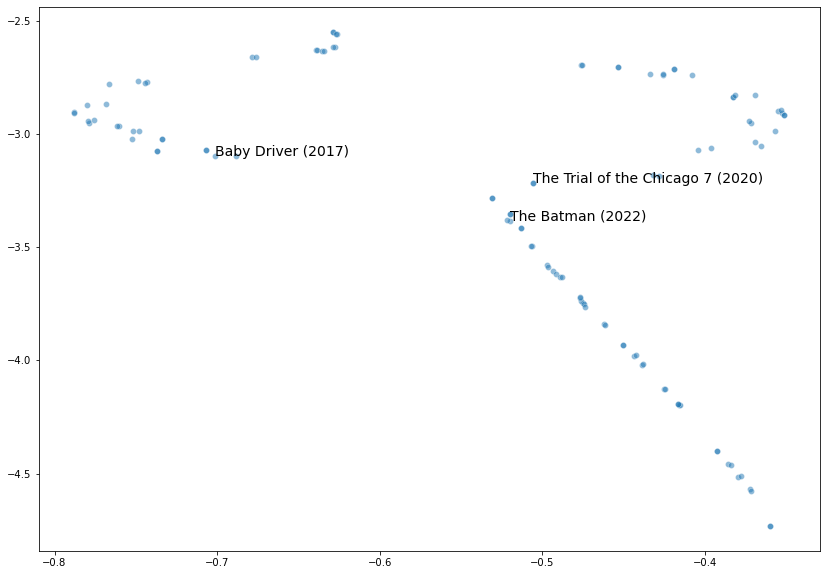

In [67]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:400])
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

#pip install adjustTest
from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 400, 40)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()